The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [107]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Start coding here!
df = pd.read_csv("data/nobel.csv")
gender = df['sex'].value_counts()

top_gender = gender.index[0]
top_gender

'Male'

In [108]:
country = df['birth_country'].value_counts()
top_country = country.index[0]
top_country

'United States of America'

In [109]:
df['usa_winner'] = df['birth_country'] == "United States of America"

df['decade'] = (np.floor(df['year'] / 10) * 10).astype(int)

decade_usa = df.groupby('decade', as_index=False)['usa_winner'].mean()

max_usa_winner = decade_usa[decade_usa['usa_winner'] == decade_usa['usa_winner'].max()]
max_decade_usa = max_usa_winner['decade']
max_decade_usa = max_decade_usa.values[0].item()

max_decade_usa

2000

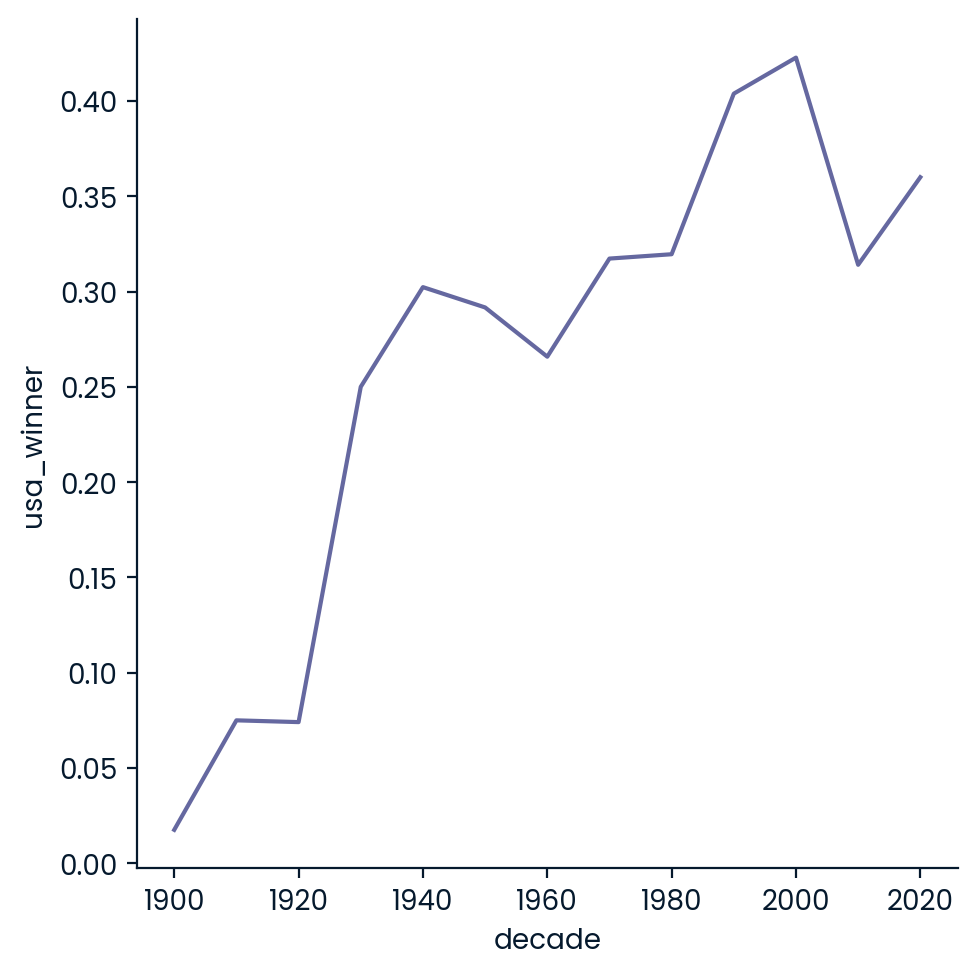

In [110]:
sns.relplot(x='decade', y='usa_winner',
            data=decade_usa,
            kind='line')
plt.show()

In [111]:
df['female_winner'] = df['sex'] == "Female"
decade_female = df.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

highest = decade_female[decade_female['female_winner'] == decade_female['female_winner'].max()][['decade', 'category']]
max_female_dict = {highest['decade'].values[0] : highest['category'].values[0]}
max_female_dict
# highest

{2020: 'Literature'}

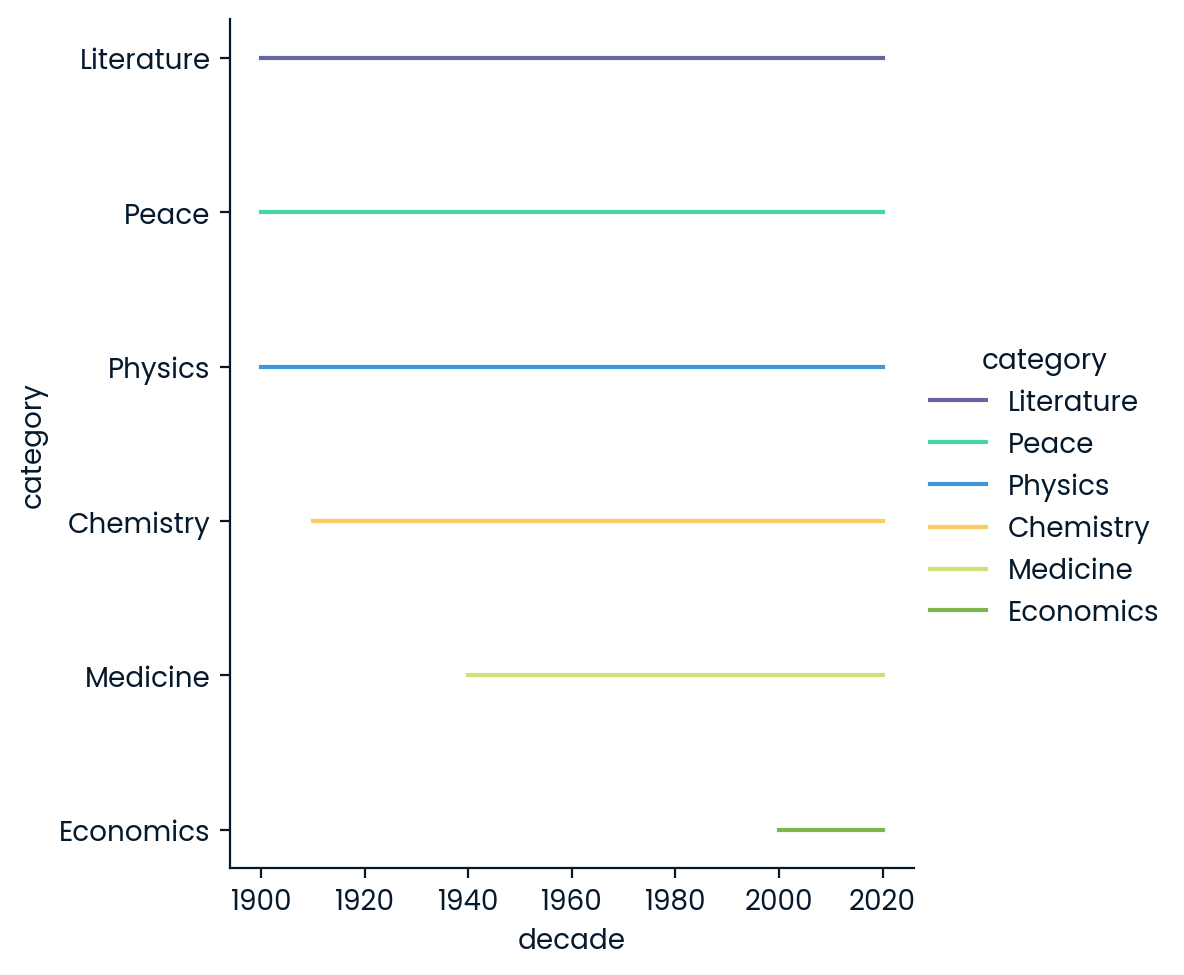

In [112]:
sns.relplot(x='decade', y='category',
            data=female_winner,
            kind='line',
            hue='category')
plt.show()

In [113]:
woman = df[df['sex'] == "Female"]
min_row = woman[woman['year'] == woman['year'].min()]
first_woman_name = min_row['full_name'].values[0]

first_woman_name

'Marie Curie, née Sklodowska'

In [114]:
first_woman_category = min_row['category'].values[0]
first_woman_category

'Physics'

In [115]:
repeat_list = []
repeats = []

name_count = df['full_name'].value_counts()
repeats = name_count[name_count >= 2].index
repeat_list = list(repeats)

repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']